In [1]:
import pandas as pd

In [2]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv("D:\\MyML\\lesson_01_HW\\HW_lesson_01\\UCI_Credit_Card.csv", sep=',', header=0, index_col='ID')
#df['SEX'].replace([2,1],['F','M'],inplace=True)
#df['EDUCATION'].replace([1,2,3,4],['graduate school','university','high school','others'],inplace=True)

In [3]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)

In [5]:
#df.dtypes #this can be used for types
df.info()#info about type and no_data

temp_data = df[['SEX','AGE']] #series for stats
print("Stats for Age and Sex data")
temp_data.describe() # stats for Sex and Age

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1  

,SEX,AGE
count,30000.000000,30000.000000
mean,1.603733,35.485500
std,0.489129,9.217904
min,1.000000,21.000000
25%,1.000000,28.000000
50%,2.000000,34.000000
75%,2.000000,41.000000
max,2.000000,79.000000


In [6]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
gradeWoman = df[(df['SEX']==2)&(df['EDUCATION']==2)]
gradeWoman.shape[0] # count of rows 
#or
#gradeWoman.counts() 
#or
#gradeWoman['SEX'].count()

8656

In [7]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO
gpby = df.groupby( [ "default.payment.next.month"] )
gpby.count()
filter_col = [col for col in df if col.startswith('BILL_') | col.startswith('PAY_') ]
filter_data = df[filter_col]
filter_data.median()

PAY_0            0.0
PAY_2            0.0
PAY_3            0.0
PAY_4            0.0
PAY_5            0.0
PAY_6            0.0
BILL_AMT1    22381.5
BILL_AMT2    21200.0
BILL_AMT3    20088.5
BILL_AMT4    19052.0
BILL_AMT5    18104.5
BILL_AMT6    17071.0
PAY_AMT1      2100.0
PAY_AMT2      2009.0
PAY_AMT3      1800.0
PAY_AMT4      1500.0
PAY_AMT5      1500.0
PAY_AMT6      1500.0
dtype: float64

In [8]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

df.pivot_table(df,index=["SEX","EDUCATION","MARRIAGE"])# I do not know what is 0,5,6 in education

AGE      BILL_AMT1      BILL_AMT2  \
SEX EDUCATION MARRIAGE                                            
1   0         1         41.000000   11612.500000    4326.000000   
              2         36.500000   11051.666667   11051.666667   
    1         0         37.000000     298.000000     750.000000   
              1         42.423077   60196.886391   56841.282840   
              2         31.704899   54064.399164   52811.889480   
              3         44.533333   64661.733333   60919.266667   
    2         0         38.000000     176.000000     252.000000   
              1         40.332489   56465.218143   54125.950211   
              2         31.584354   50926.275850   48499.191837   
              3         40.698413   35491.222222   32247.698413   
    3         0         38.000000   26227.916667   31324.000000   
              1         44.338740   55910.685115   52443.879771   
              2         35.379195   45000.682327   43400.732662   
              3         47.722222   38469.972222   36403.472222   
    4         1         41.777778   76830.777778   60217.833333   
              2         28.173913   64118.739130   56253.086957   
              3         27.000000    3462.000000    1147.000000   
    5         1         39.354167  104611.791667   99782.916667   
              2         32.630435   74828.086957   70983.934783   
              3         44.000000   40199.000000   39218.000000   
    6         1         48.000000   78274.500000   67747.071429   
              2         40.363636   37394.545455   38328.818182   
2   0         1         37.500000   22374.500000   23274.000000   
              2         42.000000    7662.250000    4821.000000   
    1         0         36.333333    3148.666667    1785.333333   
              1         38.870571   44337.774114   43080.453248   
              2         30.158046   43004.106082   41783.862787   
              3         38.150000   55192.750000   41806.850000   
    2         0         35.800000   31881.400000   35419.200000   
              1         37.527504   54135.562835   51873.166145   
              2         30.405637   53866.076961   51843.868873   
              3         40.868687   43196.595960   40408.939394   
    3         0         38.218750   19299.093750   22961.125000   
              1         42.356315   45768.902372   44013.479316   
              2         36.240394   46695.179310   44834.025616   
              3         46.059701   35120.835821   34891.492537   
    4         1         37.941176   36574.382353   34017.352941   
              2         30.355556   58092.511111   50716.133333   
              3         40.500000     442.500000     649.000000   
    5         1         37.725490   79611.725490   75950.607843   
              2         32.234568   73882.592593   63430.012346   
              3         37.500000  121721.000000  114733.000000   
    6         1         45.000000   85957.571429   85063.785714   
              2         40.900000  111611.000000  110975.700000   
              3         42.000000  181866.000000  160283.000000   

                            BILL_AMT3      BILL_AMT4     BILL_AMT5  \
SEX EDUCATION MARRIAGE                                               
1   0         1           7871.000000   20295.500000   1926.500000   
              2          17312.500000   10767.333333   7372.166667   
    1         0            179.000000    1576.000000    497.000000   
              1          55180.526036   51360.938462  48348.436095   
              2          49665.841246   46617.539309  42545.724269   
              3          60893.433333   57469.500000  52784.100000   
    2         0              0.000000       0.000000      0.000000   
              1          51740.359494   47514.228270  44393.006329   
              2          45166.255782   41269.722449  37845.888435   
              3          32142.619048   25978.333333  21556.095238   
    3         0          18821.583333   

In [9]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >lim
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO
def newstringcheck(lim):
    if(lim<=10000):
        return 'A'
    if(lim<=100000 and lim>10000):
        return 'B'
    if(lim<=200000 and lim>100000):
        return 'С'  
    if(lim<=400000 and lim>200000):
        return 'D'
    if(lim<=700000 and lim>400000):
        return 'E'
    if(lim>700000):
        return 'F'
dfnew = df.copy()
dfnew['newcolumn']=dfnew['LIMIT_BAL'].map(newstringcheck)
dfnew
    

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,newcolumn
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,B
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,С
3,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,B
4,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,B
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,B
6,50000.0,1,1,2,37,0,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,B
7,500000.0,1,1,2,29,0,0,0,0,0,...,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,E
8,100000.0,2,2,2,23,0,-1,-1,0,0,...,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,B
9,140000.0,2,3,1,28,0,0,2,0,0,...,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,С


In [10]:
%matplotlib inline

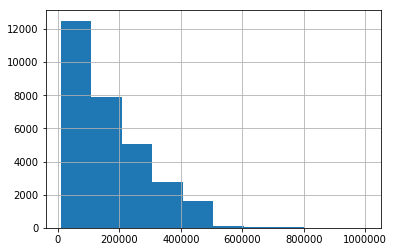

In [11]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)
df['LIMIT_BAL'].hist()

C:\Users\Legat\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


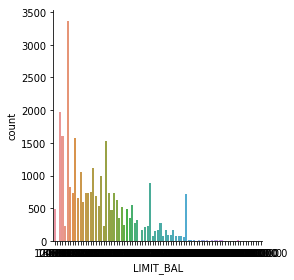

In [12]:
import seaborn as sns
sns.factorplot('LIMIT_BAL', data=df, kind='count')

In [13]:
#df #TODO

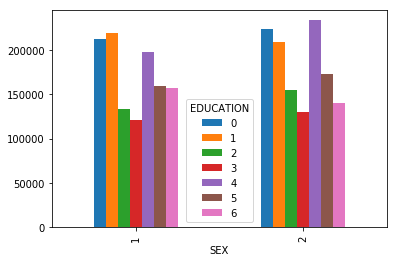

In [14]:
# (8) построить среднее значение кредитного лимита для каждого вида образования 
# и для каждого пола
# график необходимо сделать очень широким (на весь экран)
df.pivot_table(values='LIMIT_BAL', index='SEX', columns='EDUCATION',aggfunc='mean').plot(kind='bar')

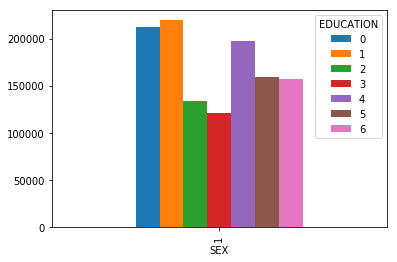

In [15]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов
table = df.pivot_table(values='LIMIT_BAL', index='SEX', columns='EDUCATION',aggfunc='mean')#.plot(kind='bar')
res = table.query('SEX == [1]')
res.plot(kind='bar')
#TODO

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201F1228CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000201F27314A8>]], dtype=object)

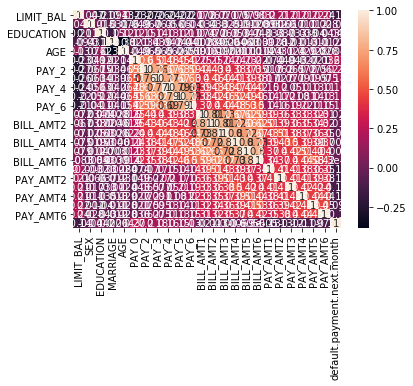

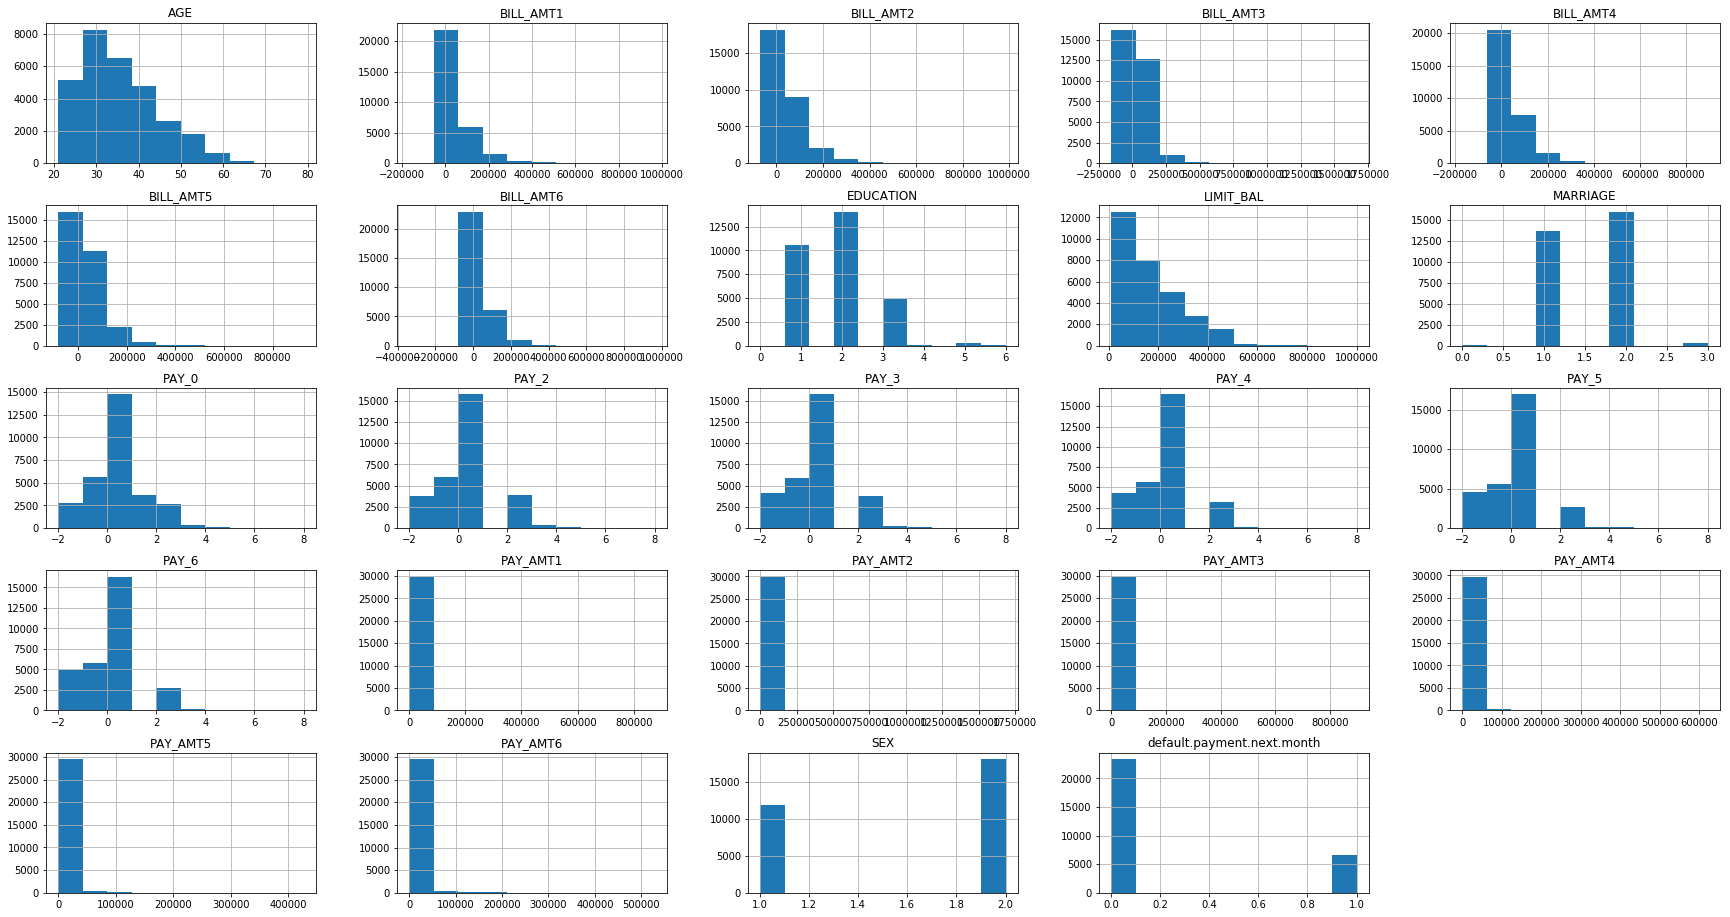

In [18]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
#import seaborn
sns.heatmap(df.corr('kendall'),annot=True)
df.hist(figsize=(30,16))
#TODO